In [6]:
# PROJECT - 1
import pandas as pd
import numpy as np

# Load the CSV file into a DataFrame
df = pd.read_csv('Downloads/Global_Superstore.csv')

# 1. Handle missing values
# Fill missing numeric values (Sales, Profit) with mean
for col in ['Sales', 'Profit']:
    if df[col].isnull().any():
        df[col].fillna(df[col].mean(), inplace=True)

# Fill missing categorical values (Region, Product Categories) with mode
for col in ['Region', 'Product Categories']:
    if df[col].isnull().any():
        df[col].fillna(df[col].mode()[0], inplace=True)

# 2. Remove duplicate records
df = df.drop_duplicates()

# 3. Detect and handle outliers in numeric columns using IQR method
for col in ['Sales', 'Profit']:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Cap outliers
    df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
    df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])

# df now holds the cleaned data
print(df.head())
data=df.to_csv('Downloads/Cleaned_Global_Superstore.csv', index=False)

    Sales  Profit   Region Product Categories
0  851.34  200.55     East         Technology
1  620.50  150.00     West          Furniture
2  430.00   80.50  Central    Office Supplies
3  950.60  247.50     East         Technology
4  720.20  120.00    South          Furniture


In [7]:
import pandas as pd

# Load the CSV file into a DataFrame
df = pd.read_csv('Downloads/Global_Superstore.csv')

# Statistical measures for numeric columns
stats_summary = df[['Sales', 'Profit']].agg(['mean', 'median', 'std', 'var'])

# Compute correlation matrix between numeric variables
correlations = df[['Sales', 'Profit']].corr()

print("Statistical Summary:\n", stats_summary)
print("\nCorrelation Matrix:\n", correlations)


Statistical Summary:
                Sales       Profit
mean      594.849744   117.683333
median    600.000000   100.500000
std       183.808142    57.931748
var     33785.432897  3356.087412

Correlation Matrix:
            Sales    Profit
Sales   1.000000  0.930107
Profit  0.930107  1.000000


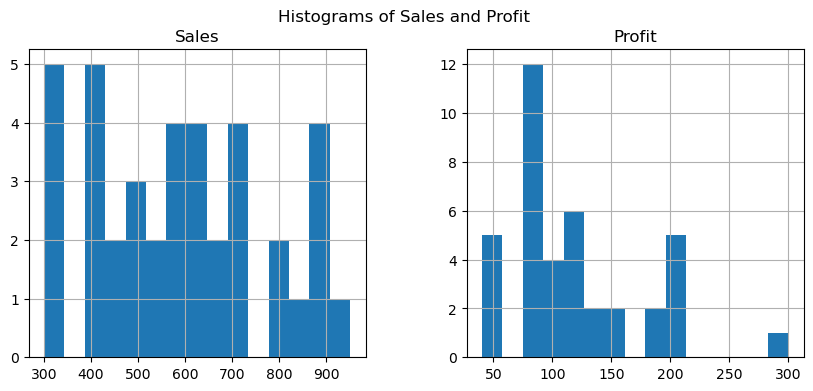

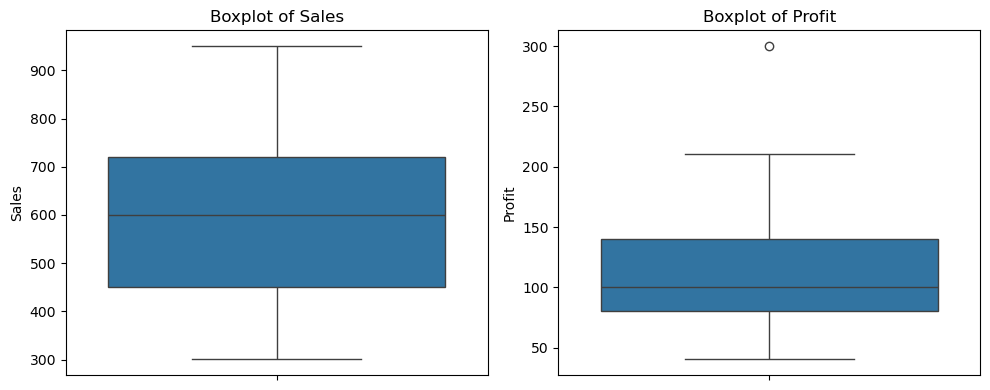

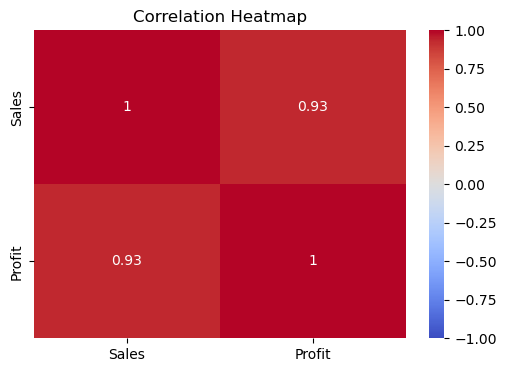

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv('Downloads/Global_Superstore.csv')

# Histogram for numerical columns
df[['Sales', 'Profit']].hist(bins=15, figsize=(10,4))
plt.suptitle('Histograms of Sales and Profit')
plt.show()

# Boxplots to identify outliers
plt.figure(figsize=(10,4))
plt.subplot(1, 2, 1)
sns.boxplot(y=df['Sales'])
plt.title('Boxplot of Sales')

plt.subplot(1, 2, 2)
sns.boxplot(y=df['Profit'])
plt.title('Boxplot of Profit')

plt.tight_layout()
plt.show()

# Heatmap of correlation matrix
plt.figure(figsize=(6,4))
corr = df[['Sales', 'Profit']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()


=== SALES DATA ANALYSIS PROJECT ===

1. LOADING AND EXPLORING THE DATASET
--------------------------------------------------
Dataset Shape: (30, 7)
Rows: 30, Columns: 7

First 5 rows:
               Product         Region  Sales  Profit  Discount     Category  \
0        Laptop Pro 15  North America   2500   625.0      0.10  Electronics   
1  Office Chair Deluxe         Europe    450   135.0      0.05    Furniture   
2       Wireless Mouse   Asia Pacific     75    22.5      0.15  Electronics   
3        Standing Desk  North America    800   200.0      0.08    Furniture   
4       Tablet 10 inch         Europe    650   162.5      0.12  Electronics   

         Date  
0  15-01-2024  
1  18-01-2024  
2  22-01-2024  
3  25-01-2024  
4  02-02-2024  

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Product   30 non-null     object 
 1   Region

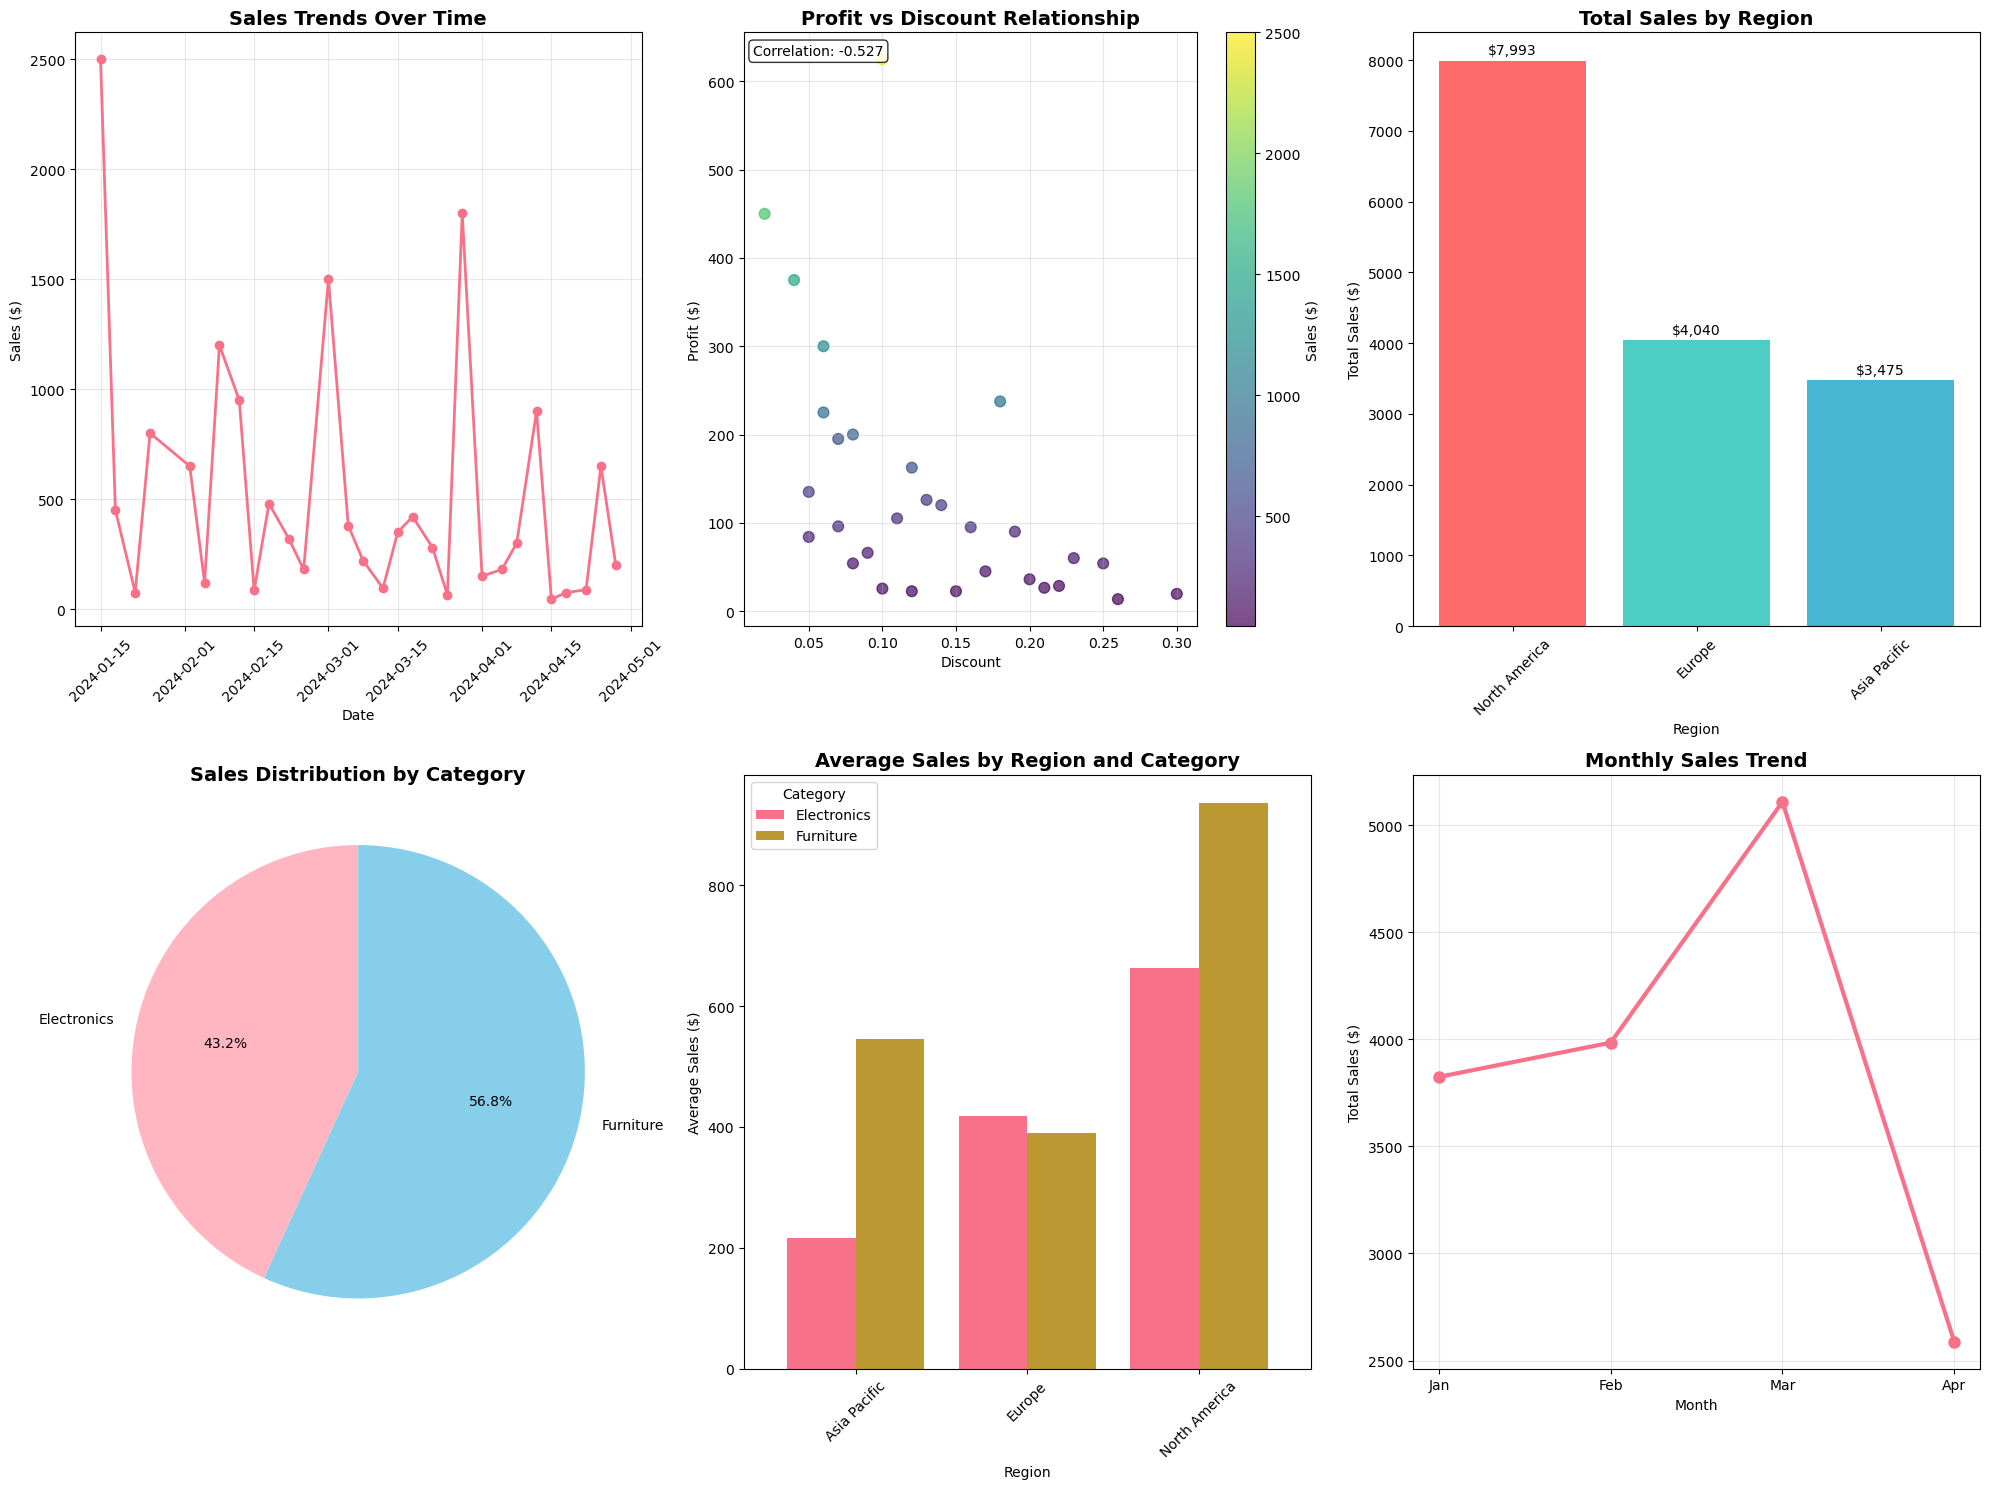


KEY INSIGHTS:
------------------------------
• Total Sales: $15,508.00
• Average Sales per Transaction: $516.93
• Total Profit: $4,094.40
• Average Discount: 13.4%
• Top Selling Region: North America ($7,993.00)
• Top Product: Laptop Pro 15 ($2,500.00)


4. PREDICTIVE MODELING - LINEAR REGRESSION
--------------------------------------------------
Features (X): ['Profit', 'Discount']
Target (y): Sales
Dataset shape: 30 samples, 2 features

Training set: 24 samples
Test set: 6 samples

MODEL PERFORMANCE:
------------------------------
Training R² Score: 0.9977
Test R² Score: 0.9620
Training RMSE: $29.27
Test RMSE: $32.00
Training MAE: $22.10
Test MAE: $27.34

MODEL COEFFICIENTS:
------------------------------
Intercept: $-69.85
Profit: 4.1140
Discount: 193.7951

FEATURE IMPORTANCE:
------------------------------
    Feature  Coefficient  Abs_Coefficient
1  Discount   193.795088       193.795088
0    Profit     4.113966         4.113966


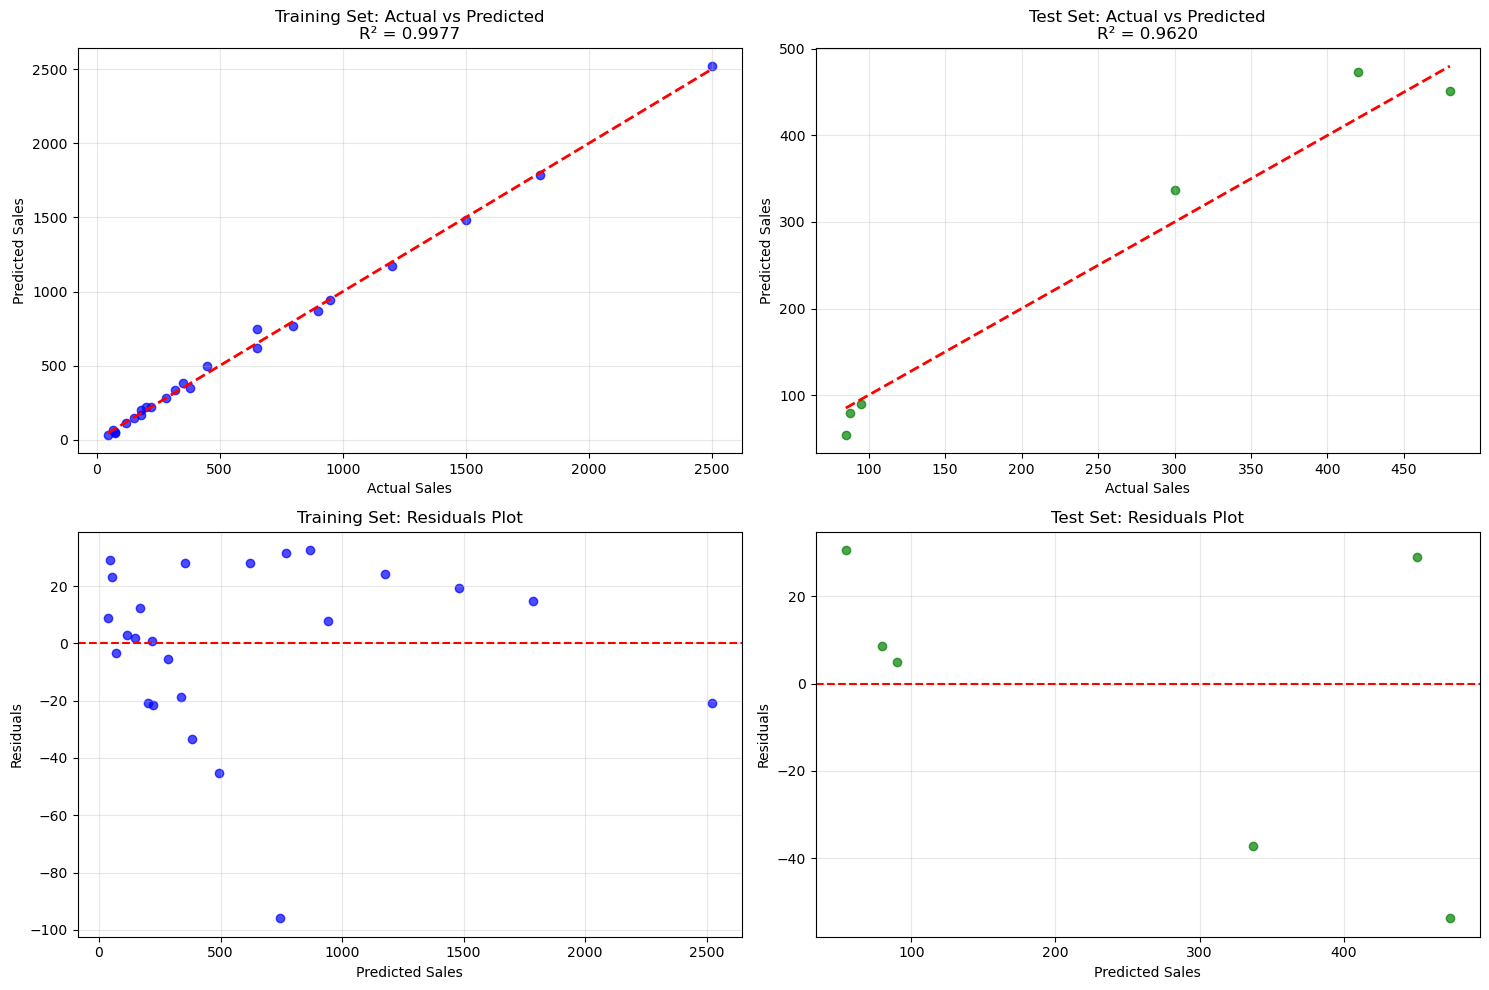


SAMPLE PREDICTIONS:
------------------------------
   Profit  Discount  Actual_Sales  Predicted_Sales  Error
0    26.4      0.21            88            79.45   8.55
1    28.5      0.22            95            90.03   4.97
2    90.0      0.19           300           337.23 -37.23
3   126.0      0.13           420           473.70 -53.70
4    25.5      0.10            85            54.43  30.57

=== ANALYSIS COMPLETE ===
The Linear Regression model achieved an R² score of 0.9620 on the test set.
This means the model explains 96.2% of the variance in Sales.
The model shows excellent predictive performance!


In [1]:
# PROJECT - 2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import warnings
warnings.filterwarnings('ignore')

# Set up plotting style
plt.style.use('default')
sns.set_palette("husl")

print("=== SALES DATA ANALYSIS PROJECT ===\n")

# ===============================
# 1. LOAD AND EXPLORE THE DATASET
# ===============================

print("1. LOADING AND EXPLORING THE DATASET")
print("-" * 50)

# Load the dataset
df = pd.read_csv('Downloads/sales_data.csv')

print("Dataset Shape:", df.shape)
print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}\n")

print("First 5 rows:")
print(df.head())

print("\nDataset Info:")
print(df.info())

print("\nData Types:")
print(df.dtypes)

print("\nMissing Values:")
print(df.isnull().sum())

print("\nBasic Statistics:")
print(df.describe())

# ===============================
# 2. DATA CLEANING
# ===============================

print("\n\n2. DATA CLEANING")
print("-" * 50)

print("Original dataset shape:", df.shape)

# Check for duplicates
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

# Remove duplicates if any
if duplicates > 0:
    df = df.drop_duplicates()
    print(f"Dataset shape after removing duplicates: {df.shape}")
else:
    print("No duplicates found.")

# Check for missing values
missing_values = df.isnull().sum()
print(f"\nMissing values per column:")
print(missing_values)

# Fill missing values if any (using appropriate strategies)
if missing_values.sum() > 0:
    # For numerical columns, use median
    numerical_cols = df.select_dtypes(include=[np.number]).columns
    for col in numerical_cols:
        if df[col].isnull().sum() > 0:
            df[col].fillna(df[col].median(), inplace=True)
            print(f"Filled missing values in {col} with median")
    
    # For categorical columns, use mode
    categorical_cols = df.select_dtypes(include=['object']).columns
    for col in categorical_cols:
        if df[col].isnull().sum() > 0:
            df[col].fillna(df[col].mode()[0], inplace=True)
            print(f"Filled missing values in {col} with mode")
else:
    print("No missing values found.")

# Convert Date column to datetime
print(f"\nOriginal Date column type: {df['Date'].dtype}")
df['Date'] = pd.to_datetime(df['Date'])
print(f"Converted Date column type: {df['Date'].dtype}")

# Extract additional date features for analysis
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

print("\nData cleaning completed!")

# ===============================
# 3. EXPLORATORY DATA ANALYSIS
# ===============================

print("\n\n3. EXPLORATORY DATA ANALYSIS")
print("-" * 50)

# Create subplots for better organization
fig = plt.figure(figsize=(20, 15))

# 3.1 Time Series Analysis - Sales over time
plt.subplot(2, 3, 1)
df_sorted = df.sort_values('Date')
plt.plot(df_sorted['Date'], df_sorted['Sales'], marker='o', linewidth=2, markersize=6)
plt.title('Sales Trends Over Time', fontsize=14, fontweight='bold')
plt.xlabel('Date')
plt.ylabel('Sales ($)')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)

# 3.2 Scatter Plot - Relationship between Profit and Discount
plt.subplot(2, 3, 2)
plt.scatter(df['Discount'], df['Profit'], alpha=0.7, s=60, c=df['Sales'], cmap='viridis')
plt.colorbar(label='Sales ($)')
plt.title('Profit vs Discount Relationship', fontsize=14, fontweight='bold')
plt.xlabel('Discount')
plt.ylabel('Profit ($)')
plt.grid(True, alpha=0.3)

# Calculate correlation
correlation = df['Profit'].corr(df['Discount'])
plt.text(0.02, 0.98, f'Correlation: {correlation:.3f}', 
         transform=plt.gca().transAxes, fontsize=10, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

# 3.3 Sales Distribution by Region (Bar Plot)
plt.subplot(2, 3, 3)
region_sales = df.groupby('Region')['Sales'].sum().sort_values(ascending=False)
bars = plt.bar(region_sales.index, region_sales.values, color=['#FF6B6B', '#4ECDC4', '#45B7D1'])
plt.title('Total Sales by Region', fontsize=14, fontweight='bold')
plt.xlabel('Region')
plt.ylabel('Total Sales ($)')
plt.xticks(rotation=45)
# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 50,
             f'${height:,.0f}', ha='center', va='bottom')

# 3.4 Sales Distribution by Category (Pie Chart)
plt.subplot(2, 3, 4)
category_sales = df.groupby('Category')['Sales'].sum()
colors = ['#FFB6C1', '#87CEEB']
plt.pie(category_sales.values, labels=category_sales.index, autopct='%1.1f%%', 
        colors=colors, startangle=90)
plt.title('Sales Distribution by Category', fontsize=14, fontweight='bold')

# 3.5 Average Sales by Region and Category
plt.subplot(2, 3, 5)
avg_sales = df.groupby(['Region', 'Category'])['Sales'].mean().unstack()
avg_sales.plot(kind='bar', ax=plt.gca(), width=0.8)
plt.title('Average Sales by Region and Category', fontsize=14, fontweight='bold')
plt.xlabel('Region')
plt.ylabel('Average Sales ($)')
plt.xticks(rotation=45)
plt.legend(title='Category')

# 3.6 Monthly Sales Trend
plt.subplot(2, 3, 6)
monthly_sales = df.groupby('Month')['Sales'].sum()
plt.plot(monthly_sales.index, monthly_sales.values, marker='o', linewidth=3, markersize=8)
plt.title('Monthly Sales Trend', fontsize=14, fontweight='bold')
plt.xlabel('Month')
plt.ylabel('Total Sales ($)')
plt.grid(True, alpha=0.3)
# Add month labels
month_names = ['Jan', 'Feb', 'Mar', 'Apr']
plt.xticks(monthly_sales.index, month_names)

plt.tight_layout()
plt.savefig('sales_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

# Additional Analysis
print("\nKEY INSIGHTS:")
print("-" * 30)
print(f"• Total Sales: ${df['Sales'].sum():,.2f}")
print(f"• Average Sales per Transaction: ${df['Sales'].mean():.2f}")
print(f"• Total Profit: ${df['Profit'].sum():,.2f}")
print(f"• Average Discount: {df['Discount'].mean():.1%}")
print(f"• Top Selling Region: {region_sales.index[0]} (${region_sales.iloc[0]:,.2f})")
print(f"• Top Product: {df.loc[df['Sales'].idxmax(), 'Product']} (${df['Sales'].max():,.2f})")

# ===============================
# 4. PREDICTIVE MODELING
# ===============================

print("\n\n4. PREDICTIVE MODELING - LINEAR REGRESSION")
print("-" * 50)

# Prepare features and target
X = df[['Profit', 'Discount']]  # Features
y = df['Sales']  # Target

print("Features (X):", X.columns.tolist())
print("Target (y): Sales")
print(f"Dataset shape: {X.shape[0]} samples, {X.shape[1]} features")

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"\nTraining set: {X_train.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")

# Train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Calculate metrics
train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)
train_mse = mean_squared_error(y_train, y_pred_train)
test_mse = mean_squared_error(y_test, y_pred_test)
train_mae = mean_absolute_error(y_train, y_pred_train)
test_mae = mean_absolute_error(y_test, y_pred_test)

print("\nMODEL PERFORMANCE:")
print("-" * 30)
print(f"Training R² Score: {train_r2:.4f}")
print(f"Test R² Score: {test_r2:.4f}")
print(f"Training RMSE: ${np.sqrt(train_mse):.2f}")
print(f"Test RMSE: ${np.sqrt(test_mse):.2f}")
print(f"Training MAE: ${train_mae:.2f}")
print(f"Test MAE: ${test_mae:.2f}")

# Model coefficients
print(f"\nMODEL COEFFICIENTS:")
print("-" * 30)
print(f"Intercept: ${model.intercept_:.2f}")
for feature, coef in zip(X.columns, model.coef_):
    print(f"{feature}: {coef:.4f}")

# Feature importance (absolute coefficients)
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_,
    'Abs_Coefficient': np.abs(model.coef_)
}).sort_values('Abs_Coefficient', ascending=False)

print(f"\nFEATURE IMPORTANCE:")
print("-" * 30)
print(feature_importance)

# Visualization of model performance
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# 4.1 Actual vs Predicted (Training)
axes[0, 0].scatter(y_train, y_pred_train, alpha=0.7, color='blue')
axes[0, 0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', lw=2)
axes[0, 0].set_xlabel('Actual Sales')
axes[0, 0].set_ylabel('Predicted Sales')
axes[0, 0].set_title(f'Training Set: Actual vs Predicted\nR² = {train_r2:.4f}')
axes[0, 0].grid(True, alpha=0.3)

# 4.2 Actual vs Predicted (Test)
axes[0, 1].scatter(y_test, y_pred_test, alpha=0.7, color='green')
axes[0, 1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
axes[0, 1].set_xlabel('Actual Sales')
axes[0, 1].set_ylabel('Predicted Sales')
axes[0, 1].set_title(f'Test Set: Actual vs Predicted\nR² = {test_r2:.4f}')
axes[0, 1].grid(True, alpha=0.3)

# 4.3 Residuals Plot (Training)
residuals_train = y_train - y_pred_train
axes[1, 0].scatter(y_pred_train, residuals_train, alpha=0.7, color='blue')
axes[1, 0].axhline(y=0, color='red', linestyle='--')
axes[1, 0].set_xlabel('Predicted Sales')
axes[1, 0].set_ylabel('Residuals')
axes[1, 0].set_title('Training Set: Residuals Plot')
axes[1, 0].grid(True, alpha=0.3)

# 4.4 Residuals Plot (Test)
residuals_test = y_test - y_pred_test
axes[1, 1].scatter(y_pred_test, residuals_test, alpha=0.7, color='green')
axes[1, 1].axhline(y=0, color='red', linestyle='--')
axes[1, 1].set_xlabel('Predicted Sales')
axes[1, 1].set_ylabel('Residuals')
axes[1, 1].set_title('Test Set: Residuals Plot')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('model_performance.png', dpi=300, bbox_inches='tight')
plt.show()

# Sample predictions
print(f"\nSAMPLE PREDICTIONS:")
print("-" * 30)
sample_data = X_test.head()
sample_predictions = model.predict(sample_data)
sample_actual = y_test.head()

results_df = pd.DataFrame({
    'Profit': sample_data['Profit'].values,
    'Discount': sample_data['Discount'].values,
    'Actual_Sales': sample_actual.values,
    'Predicted_Sales': sample_predictions,
    'Error': sample_actual.values - sample_predictions
})

print(results_df.round(2))

print(f"\n=== ANALYSIS COMPLETE ===")
print(f"The Linear Regression model achieved an R² score of {test_r2:.4f} on the test set.")
print(f"This means the model explains {test_r2*100:.1f}% of the variance in Sales.")

if test_r2 > 0.8:
    print("The model shows excellent predictive performance!")
elif test_r2 > 0.6:
    print("The model shows good predictive performance.")
elif test_r2 > 0.4:
    print("The model shows moderate predictive performance.")
else:
    print("The model may need improvement or additional features.")